# Effect of GP firing rate on SNr response time

## Mapping input excitatory current to 1) firing rate of GPe and 2) total net inhibition to SNr

Simulations are performed with constant current injection for steady-state solution.

### 1) Firing rate of GPe is proportional to excitatory input current (above 30pA).

In [63]:
Igp_range = 10:10:100; % pA 
fr_gp=[];
for i = 1:length(Igp_range)

spk_gp=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:10
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials
spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
end

fr_gp(i) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

y(i) = mean(Isnr_net);
e(i) = std(Isnr_net);

end


Elapsed time is 1.857246 seconds.
Elapsed time is 0.899359 seconds.
Elapsed time is 0.896314 seconds.
Elapsed time is 0.858331 seconds.
Elapsed time is 0.865181 seconds.
Elapsed time is 0.849536 seconds.
Elapsed time is 0.919915 seconds.
Elapsed time is 0.893519 seconds.
Elapsed time is 0.863032 seconds.
Elapsed time is 0.825483 seconds.
Elapsed time is 0.848466 seconds.
Elapsed time is 1.765537 seconds.
Elapsed time is 0.835618 seconds.
Elapsed time is 0.907029 seconds.
Elapsed time is 0.867256 seconds.
Elapsed time is 0.886947 seconds.
Elapsed time is 0.907603 seconds.
Elapsed time is 0.912037 seconds.
Elapsed time is 0.871379 seconds.
Elapsed time is 0.832982 seconds.
Elapsed time is 0.832234 seconds.
Elapsed time is 0.836331 seconds.
Elapsed time is 1.858143 seconds.
Elapsed time is 0.890097 seconds.
Elapsed time is 0.970494 seconds.
Elapsed time is 0.876349 seconds.
Elapsed time is 0.889719 seconds.
Elapsed time is 0.862124 seconds.
Elapsed time is 0.865460 seconds.
Elapsed time i

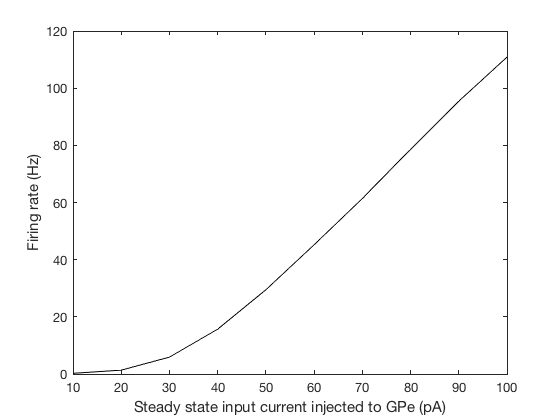

In [70]:
plot(Igp_range,fr_gp,'k')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Firing rate (Hz)')

### 2) Net inhibitory current to SNr is proportional to excitatory input current (above 30pA).

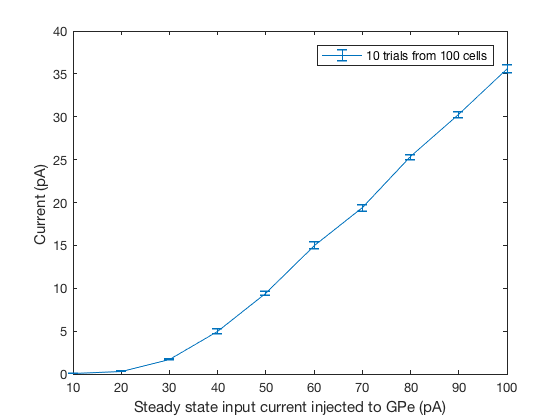

In [68]:
errorbar(Igp_range,y,e./sqrt(10)) % plotting mean and stanard error of the mean
legend('10 trials from 100 cells')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Current (pA) ')

Thus, injected current to GPe is proportional to firing rate of GPe as well as net inhibition to SNr

## Mapping the parameter space that control the net inhibitory current to SNr. 

1) Sweep across 10-100 pA of excitatory input to GPe -- to control firing rate. 

2) Also test synaptic transmission probabilities rainging from 0 to 1 in increment of 0.1. 

In [72]:
% excitatory input to GPe test range
gp_in = 10:10:100; %pA

% gp2snr synaptic transmission test range
P_gp2snr = 0:0.1:1;

fr_gp = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_mean = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_std = zeros(length(gp_in),length(P_gp2snr));
for param1 = 1:length(gp_in)
    for param2 = 1:length(P_gp2snr)
    
        spk_gp=[];
        Isnr_net=[];
        dt=0.0001; % 0.1ms integration steps

        %Runs 5s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2)); % initial conductance of gp to snr synapses 

        for l = 1:10
        %Silent striatum, testing different constant excitatory input to GPe and probability of transmission
        [Vm_gp,~,~,~, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2),'g_gp2snr_i',g_gp2snr);

        meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
        Isnr_net = [Isnr_net, meanIsnr];
        spk_gp = [spk_gp; Vm_gp==15];
        end
        
        fr_gp(param1,param2) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1);
        I_tot_snr_mean(param1,param2) = mean(Isnr_net);
        I_tot_snr_std(param1,param2) = std(Isnr_net);
     end
    
end


Elapsed time is 1.813939 seconds.
Elapsed time is 0.930602 seconds.
Elapsed time is 0.892861 seconds.
Elapsed time is 0.903816 seconds.
Elapsed time is 0.866712 seconds.
Elapsed time is 0.860510 seconds.
Elapsed time is 0.833524 seconds.
Elapsed time is 0.883058 seconds.
Elapsed time is 0.865457 seconds.
Elapsed time is 0.850484 seconds.
Elapsed time is 0.879793 seconds.
Elapsed time is 1.863200 seconds.
Elapsed time is 0.850072 seconds.
Elapsed time is 0.833905 seconds.
Elapsed time is 0.827995 seconds.
Elapsed time is 0.856513 seconds.
Elapsed time is 0.837763 seconds.
Elapsed time is 0.815183 seconds.
Elapsed time is 0.816781 seconds.
Elapsed time is 0.852769 seconds.
Elapsed time is 0.828070 seconds.
Elapsed time is 0.841801 seconds.
Elapsed time is 1.763017 seconds.
Elapsed time is 0.838134 seconds.
Elapsed time is 0.856289 seconds.
Elapsed time is 0.819788 seconds.
Elapsed time is 0.823190 seconds.
Elapsed time is 0.823438 seconds.
Elapsed time is 0.813818 seconds.
Elapsed time i

Elapsed time is 0.877373 seconds.
Elapsed time is 1.809885 seconds.
Elapsed time is 0.836189 seconds.
Elapsed time is 0.855418 seconds.
Elapsed time is 0.859159 seconds.
Elapsed time is 0.851136 seconds.
Elapsed time is 0.882588 seconds.
Elapsed time is 0.846704 seconds.
Elapsed time is 0.868047 seconds.
Elapsed time is 0.864628 seconds.
Elapsed time is 0.887276 seconds.
Elapsed time is 0.939871 seconds.
Elapsed time is 1.786642 seconds.
Elapsed time is 0.881331 seconds.
Elapsed time is 0.861535 seconds.
Elapsed time is 0.852794 seconds.
Elapsed time is 0.895170 seconds.
Elapsed time is 0.904958 seconds.
Elapsed time is 0.819597 seconds.
Elapsed time is 0.817205 seconds.
Elapsed time is 0.888426 seconds.
Elapsed time is 0.861331 seconds.
Elapsed time is 0.878959 seconds.
Elapsed time is 1.775612 seconds.
Elapsed time is 0.867793 seconds.
Elapsed time is 0.883464 seconds.
Elapsed time is 0.876984 seconds.
Elapsed time is 0.850881 seconds.
Elapsed time is 0.868357 seconds.
Elapsed time i

Elapsed time is 0.832687 seconds.
Elapsed time is 0.835500 seconds.
Elapsed time is 1.722237 seconds.
Elapsed time is 0.836365 seconds.
Elapsed time is 0.834256 seconds.
Elapsed time is 0.821872 seconds.
Elapsed time is 0.810226 seconds.
Elapsed time is 0.840845 seconds.
Elapsed time is 0.804698 seconds.
Elapsed time is 0.828070 seconds.
Elapsed time is 0.846689 seconds.
Elapsed time is 0.850847 seconds.
Elapsed time is 0.839431 seconds.
Elapsed time is 1.745033 seconds.
Elapsed time is 0.816683 seconds.
Elapsed time is 0.815247 seconds.
Elapsed time is 0.816591 seconds.
Elapsed time is 0.818400 seconds.
Elapsed time is 0.820808 seconds.
Elapsed time is 0.814743 seconds.
Elapsed time is 0.822600 seconds.
Elapsed time is 0.830078 seconds.
Elapsed time is 0.827030 seconds.
Elapsed time is 0.841078 seconds.
Elapsed time is 1.693614 seconds.
Elapsed time is 0.808758 seconds.
Elapsed time is 0.818228 seconds.
Elapsed time is 0.820266 seconds.
Elapsed time is 0.803847 seconds.
Elapsed time i

Elapsed time is 0.828193 seconds.
Elapsed time is 0.836622 seconds.
Elapsed time is 0.825084 seconds.
Elapsed time is 1.699449 seconds.
Elapsed time is 0.825795 seconds.
Elapsed time is 0.825445 seconds.
Elapsed time is 0.821263 seconds.
Elapsed time is 0.813838 seconds.
Elapsed time is 0.815644 seconds.
Elapsed time is 0.810293 seconds.
Elapsed time is 0.803531 seconds.
Elapsed time is 0.827798 seconds.
Elapsed time is 0.830216 seconds.
Elapsed time is 0.831289 seconds.
Elapsed time is 1.701834 seconds.
Elapsed time is 0.817132 seconds.
Elapsed time is 0.810841 seconds.
Elapsed time is 0.826691 seconds.
Elapsed time is 0.824907 seconds.
Elapsed time is 0.816660 seconds.
Elapsed time is 0.809310 seconds.
Elapsed time is 0.806246 seconds.
Elapsed time is 0.829401 seconds.
Elapsed time is 0.822943 seconds.
Elapsed time is 0.825690 seconds.
Elapsed time is 1.691432 seconds.
Elapsed time is 0.813083 seconds.
Elapsed time is 0.825185 seconds.
Elapsed time is 0.835443 seconds.
Elapsed time i

Elapsed time is 0.825873 seconds.
Elapsed time is 0.835995 seconds.
Elapsed time is 0.837164 seconds.
Elapsed time is 0.824966 seconds.
Elapsed time is 1.684457 seconds.
Elapsed time is 0.825152 seconds.
Elapsed time is 0.826272 seconds.
Elapsed time is 0.820746 seconds.
Elapsed time is 0.810301 seconds.
Elapsed time is 0.821965 seconds.
Elapsed time is 0.803228 seconds.
Elapsed time is 0.828486 seconds.
Elapsed time is 0.845703 seconds.
Elapsed time is 0.831228 seconds.
Elapsed time is 0.827621 seconds.
Elapsed time is 1.713152 seconds.
Elapsed time is 0.823985 seconds.
Elapsed time is 0.817361 seconds.
Elapsed time is 0.819351 seconds.
Elapsed time is 0.802391 seconds.
Elapsed time is 0.830866 seconds.
Elapsed time is 0.810736 seconds.
Elapsed time is 0.832130 seconds.
Elapsed time is 0.839744 seconds.
Elapsed time is 0.821632 seconds.
Elapsed time is 0.824338 seconds.
Elapsed time is 1.725212 seconds.
Elapsed time is 0.812536 seconds.
Elapsed time is 0.823273 seconds.
Elapsed time i

Elapsed time is 0.869684 seconds.
Elapsed time is 0.973265 seconds.
Elapsed time is 0.868011 seconds.
Elapsed time is 0.915507 seconds.
Elapsed time is 0.926518 seconds.


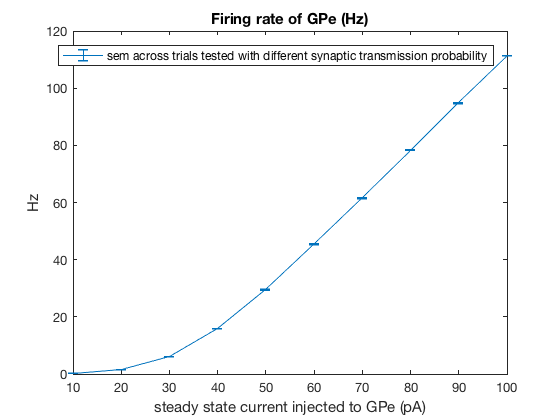

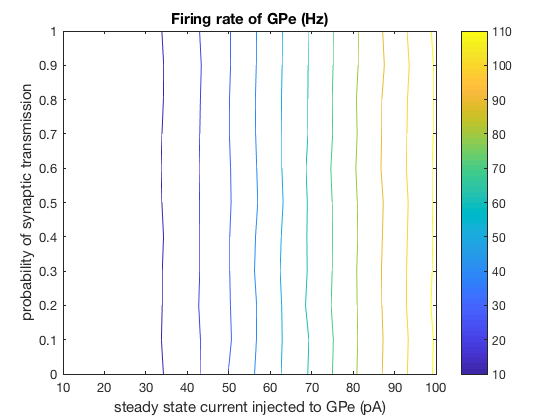

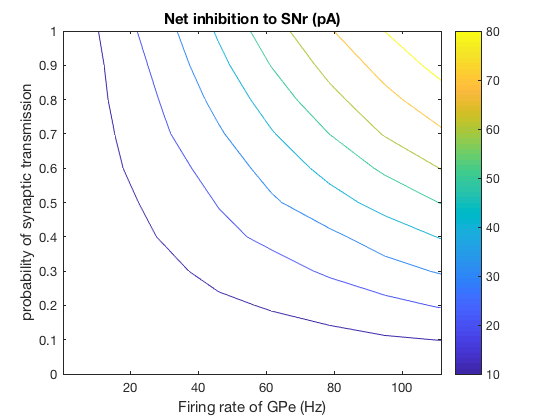

In [76]:
%figure;surfc(fr_gp(:,1),P_gp2snr,I_tot_snr_mean')
figure;contour(fr_gp(:,1),P_gp2snr,I_tot_snr_mean');colorbar
title('Net inhibition to SNr (pA)')
xlabel('Firing rate of GPe (Hz)')
ylabel('probability of synaptic transmission')

figure;contour(gp_in,P_gp2snr,fr_gp');colorbar
title('Firing rate of GPe (Hz)')
xlabel('steady state current injected to GPe (pA)')
ylabel('probability of synaptic transmission')

figure;errorbar(gp_in,mean(fr_gp,2),std(fr_gp,0,2)/sqrt(length(P_gp2snr)));
title('Firing rate of GPe (Hz)')
legend('sem across trials tested with different synaptic transmission probability')
xlabel('steady state current injected to GPe (pA)')
ylabel('Hz')


The plot reveals isoclines of net inhibitory current to SNr. The lines indicate combination of firing rate of GPe and probability of synaptic transmission that correspond to the same amount of GABAergic current. 

Next, I will look at how total net inhibition affects SNr firing depending on the net excitation. Total net inhibition is controlled by firing rate of GPe and release probability from GPe to SNr.


## Mapping net inhibitory current to SNr firing

I predict that increasing inhibitory current will linearly decrease SNr firing.

In [23]:
Isnr_inh = 10:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory
fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for m = 1:length(Isnr_exc)
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

for l = 1:10
%%Simulation
Vm_snr = BGdelayline_Isnr2snrfr('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i));
spk_snr = [spk_snr; Vm_snr==15];
end

fr_snr(i,m) = sum(sum(spk_snr(:,end-1/dt:end)))/size(spk_snr,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

end
end


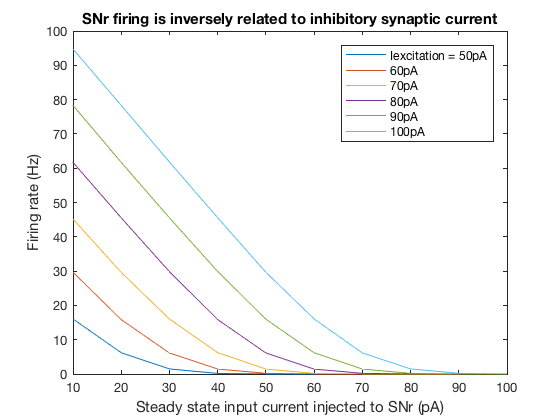

In [32]:
plot(Isnr_inh,fr_snr)
legend('Iexcitation = 50pA','60pA','70pA','80pA','90pA','100pA')
xlabel('Steady state input current injected to SNr (pA)')
ylabel('Firing rate (Hz)')
title('SNr firing is inversely related to inhibitory synaptic current' )


The plot reveals that minimal current required for repetitive firing is ~10pA (Iinh + Iexc). 

## How does SNr basal firing rate affect response time to disinhibition?

I will map SNr basal firing rate to delay at fixed excitaton input current. Then compare at different net excitation inputs.

Below, I apply constant excitation and inhibition until stimulus time t = 1s, at which I will remove inhibition (Iinh = 0pA) for 10ms. I will determine whether response time for increased SNr firing differs. 

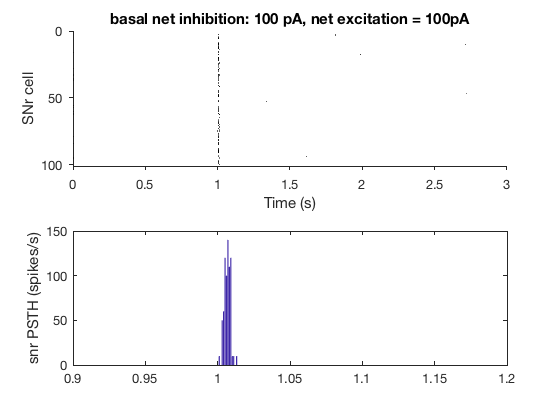

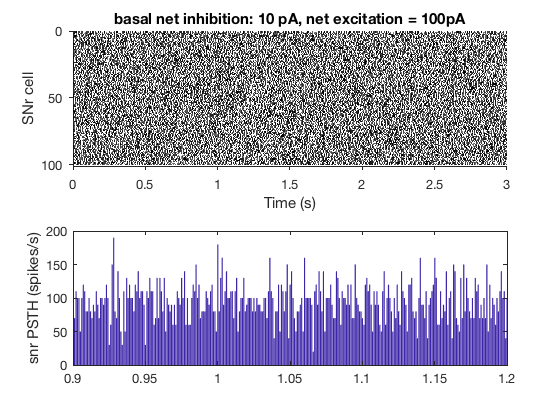

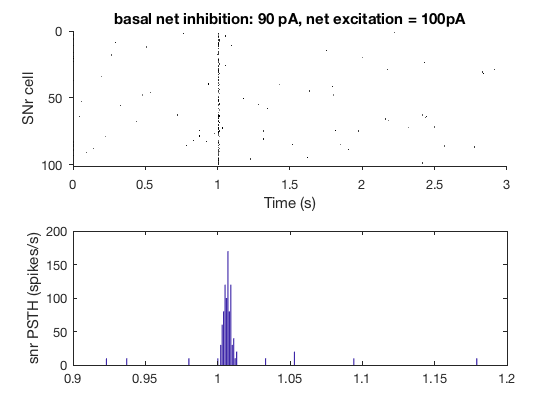

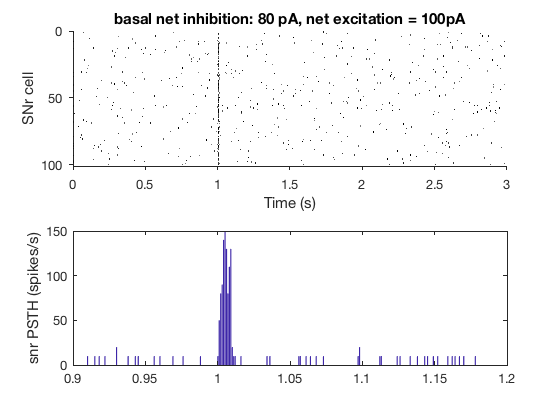

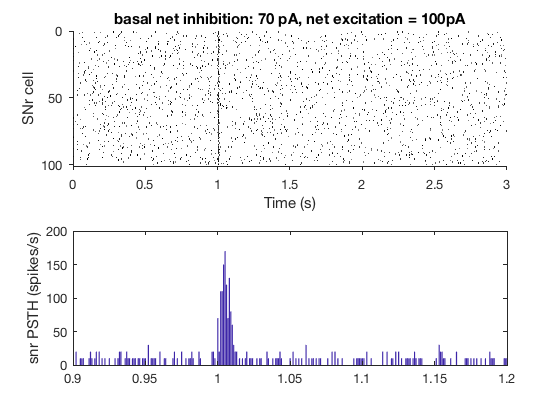

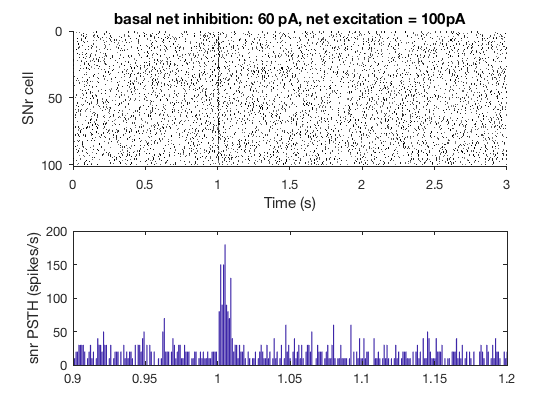

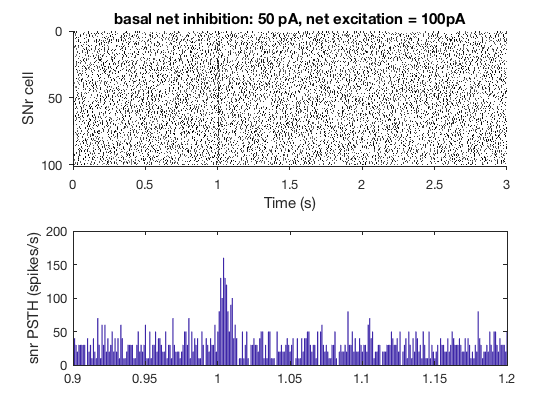

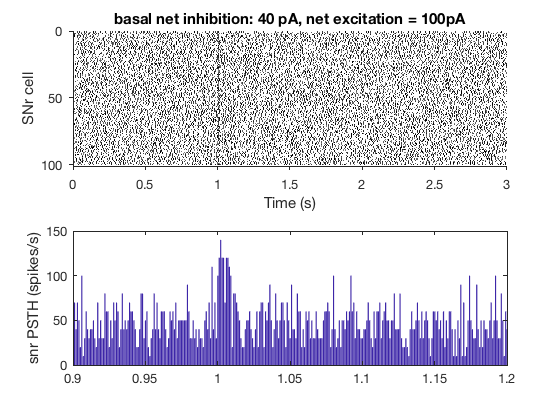

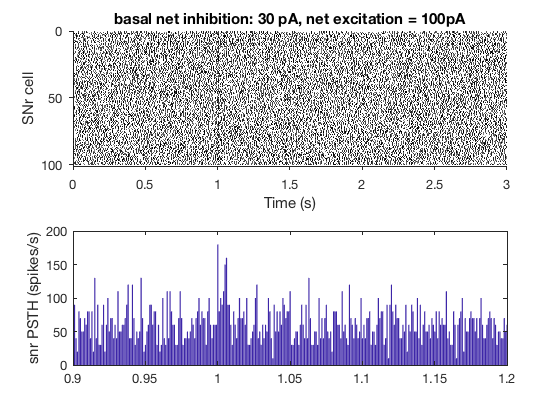

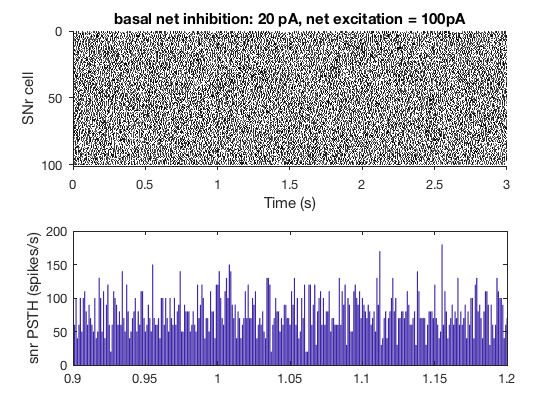

In [2]:
Isnr_inh = 10:10:100; % pA, inhibitory
%fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',100,'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

binWidth_snr = 10; %ms

t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));

end
figure(i)
subplot(2,1,1)
plotRaster(spk_snr);
ylabel('SNr cell')
title(sprintf('basal net inhibition: %d pA, net excitation = 100pA',Isnr_inh(i)))
subplot(2,1,2)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
ylabel('snr PSTH (spikes/s)')
end


The peristimulus time histogram (PSTH) from 100 SNr neurons at various GPe firing rates reveal that SNr response time is inversely related to GPe firing rate. 

### Response time of SNr at various excitatory input currents.

I plotted the latency of maximum instantaneous firing rate across varying inhibitory and excitatory input currents to SNr. 

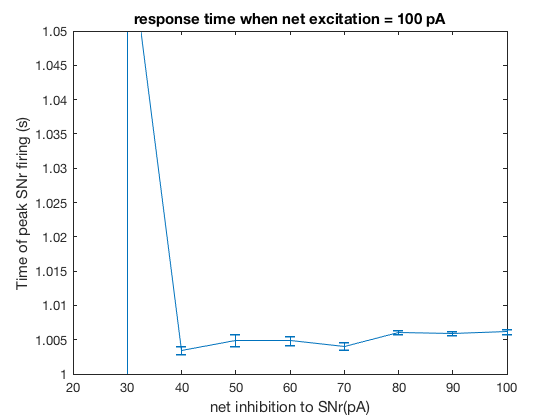

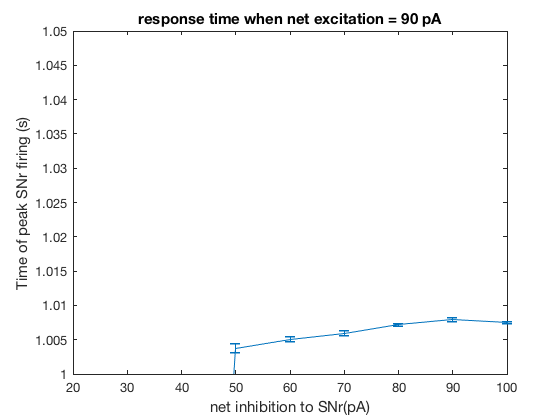

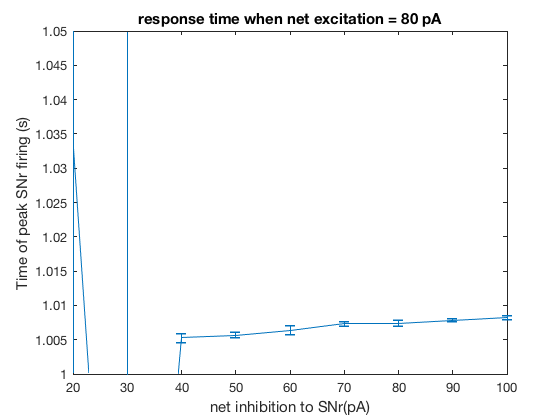

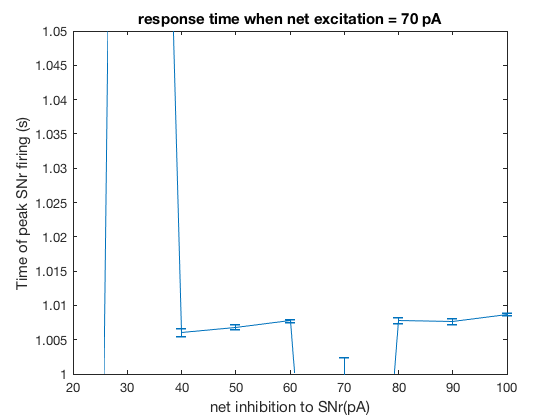

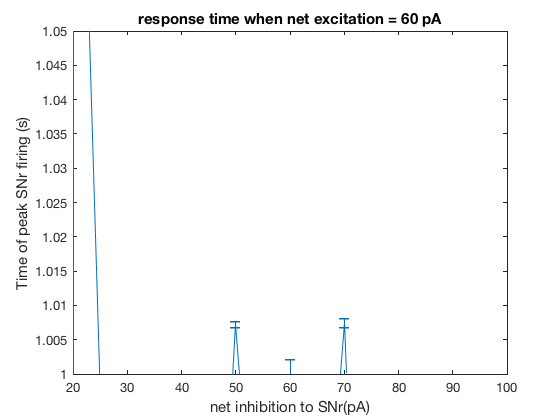

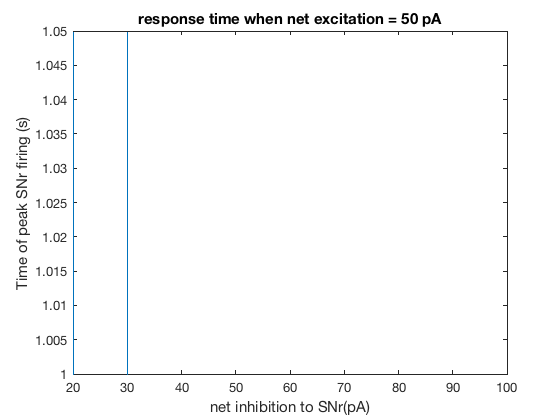

In [7]:
Isnr_inh = 10:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory

for m = 1:length(Isnr_exc)
tdelay = zeros(10,length(Isnr_inh));

for sim_i = 1:10 % number of simulations
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

% Peristimulus time histogram 
binWidth_snr = 5; %ms, bin size
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));
end

%% z-score
%mean_fr = mean(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001))); % mean before stim
%std_fr = std(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001)));  % std before stim
%z_snr{sim_i,i} = (psth_snr((1/dt/binWidth_snr-1000):end)/(size(spk_snr,1)*(binWidth_snr*0.0001))-mean_fr)/std_fr ; % z-score

[M,I]=max(psth_snr(2:end));
tdelay(sim_i,i) = t_bar_snr(I)*dt;

end
end

figure(m)
errorbar(Isnr_inh(2:end),mean(tdelay(:,2:end),1),std(tdelay(:,2:end),1)/sqrt(size(tdelay,1)))
xlabel('net inhibition to SNr(pA)')
ylabel('Time of peak SNr firing (s)' )
ylim([1 1.05])
title(sprintf('response time when net excitation = %d pA',Isnr_exc(m)))

end

This plot reveals that, when SNr can be disinhibited, net inhibitory input current is related to the response time of SNr. There is an increasing trend, but the effect seems small. 
The response time ranges between 5ms and 8ms. 

## Next steps

1) Plot response time vs. net inhibition to SNr (while total current is fixed at a constant value) -> expect that response time does not differ because basal firing rate will be the same. 

2) Analyze the how SNr response changes depending on dI/dt (inhibitory current). I hypothesize that firing rate of GPe determines the dI/dt, which affects excitability of neurons.
